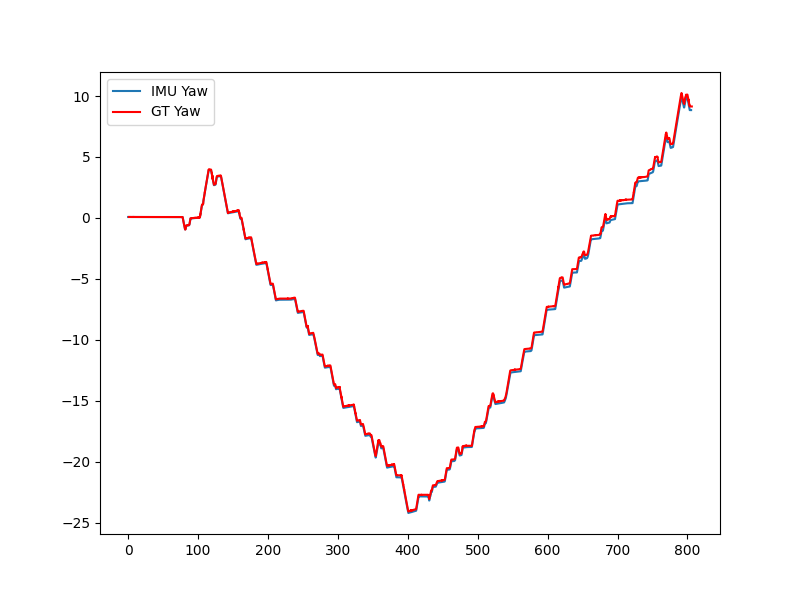

In [4]:
import os
import glob
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from utils import *
from scipy.spatial.transform import Rotation as R
%matplotlib widget

"""
IMU data array. Assumed columns:
        - Column 0: timestamp in seconds
        - Columns 1-4: accelerometer readings (x, y, z) in g
        - Columns 4-7: gyro readings (x, y, z) in deg/s
gt_data: np.ndarray
    Ground truth data array. Assumed columns:
        - Column 0: timestamp in seconds
        - Columns 1-4: positions (x, y, z)
        - Columns 4-13: flattened 3x3 rotation matrix (row-major order) [xyz rotation order with clockwise positive]
"""

gt_npy_path = "../CollectionDataset/0.15_Speed_OB/03-06_14-51_GT.npy"
imu_npy_path = "../CollectionDataset/0.15_Speed_OB/03-06_14-51_IMU.npy"
gt_data = np.load(gt_npy_path)
imu_data = np.load(imu_npy_path)

fig = plt.figure(figsize=(8,6))
GT_Rotation_matrix_list = read_GT_Rotation_matrix_list(gt_data)
GT_euler_array = -R.from_matrix(GT_Rotation_matrix_list).as_euler('xyz', degrees=True)

gyro_z = imu_data[:, 6]
timestamps = imu_data[:, 0]
dt = np.diff(timestamps, prepend=timestamps[0])
heading_deg = np.cumsum(gyro_z * dt)

plt.plot(imu_data[:,0],np.unwrap(np.radians(heading_deg+GT_euler_array[0,-1])),label="IMU Yaw")
plt.plot(gt_data[:,0],np.unwrap(np.radians(GT_euler_array[:,-1])),label="GT Yaw",color='r')
plt.legend()
plt.show()